<a href="https://colab.research.google.com/github/BusraCevik/SignLanguageRecognition/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneleri yükleme
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import io
import zipfile

# Veri setini yükleme
uploaded = files.upload()

# Yüklenen dosyaların isimlerini yazdırma
print(uploaded.keys())

# Yüklenen zip dosyasını açma
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            zip_ref.extractall()

# Zip içerisindeki dosya adını kontrol etme ve veri setini yükleme
extracted_files = zip_ref.namelist()
print(extracted_files)

# Varsayalım ki zip içinde 'sign_mnist_train/sign_mnist_train.csv' adında bir dosya var
df = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')  # Dosya adını doğru şekilde değiştirin

# Veri setini keşfetme
print(df.head())
print(df.info())
print(df.describe())

# Veri ön işleme
X = df.drop('label', axis=1)  # 'label' hedef değişkenin adını veri setinizdeki isimle değiştirin
y = df['label']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Saving SignLanguage.zip to SignLanguage (1).zip
dict_keys(['SignLanguage (1).zip'])
['amer_sign2.png', 'amer_sign3.png', 'american_sign_language.PNG', 'sign_mnist_test.csv', 'sign_mnist_test/sign_mnist_test.csv', 'sign_mnist_train.csv', 'sign_mnist_train/sign_mnist_train.csv']
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       

Random Forest Accuracy: 0.99


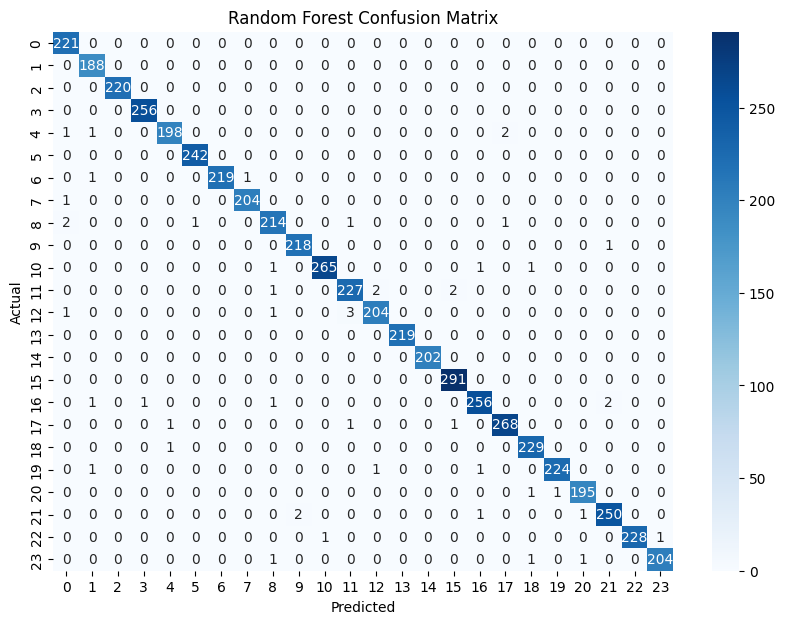

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       221
           1       0.98      1.00      0.99       188
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       256
           4       0.99      0.98      0.99       202
           5       1.00      1.00      1.00       242
           6       1.00      0.99      1.00       221
           7       1.00      1.00      1.00       205
           8       0.98      0.98      0.98       219
          10       0.99      1.00      0.99       219
          11       1.00      0.99      0.99       268
          12       0.98      0.98      0.98       232
          13       0.99      0.98      0.98       209
          14       1.00      1.00      1.00       219
          15       1.00      1.00      1.00       202
          16       0.99      1.00      0.99       291
          17       0.99      0.98      0.98       261
    

In [ ]:
# # Random Forest modeli oluşturma ve eğitme
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)

# Modeli değerlendirme
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Gerçek etiketleri alın
y_true = y_test

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_true, y_pred_rf)

# Karışıklık Matrisi Grafiği
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Sınıflandırma Raporu
print("Classification Report:")
print(classification_report(y_true, y_pred_rf))
